## 과제2 (로지스틱 회귀분석)

통계학과 김상현(202211545)

### 0. Load Data & Packages

In [1]:
import matplotlib_inline.backend_inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [3]:
df = pd.read_csv('diabetes.csv')

### 1. About Data

피마 인디언 당뇨병 데이터 세트는 북아매라커 파머 지역 원주민의 Type-2 당뇨병 결과 데이터이다.

피마 인디언 당뇨병 데이터 세트는 다음의 feature들로 구성돼 있다.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
dict_ = {}
for i in list(df.columns):
    dict_[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict_, index = ['Unique count']).transpose()

,Unique count
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


* 우리의 target인 `Outcome'은 두 가지 결과만 있다(0 또는 1)

* Features
1. Pregnancies : 임신 횟수
2. Glucose : 포도당 부하 검사 수치
3. BloodPressure : 혈압
4. SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값
5. Insulin : 혈청 인슐린
6. BMI
7. DiabetesPedigreeFunction : 당뇨 내력 가중치 값
8. Age
---
* Target
9. Outcome : 클래스 결정 값 (0 또는 1) -> 이진분류 Task

* 이진 target 변수
    * `Outcome`: 변수가 0 또는 1로 주어져, 로지스틱 회귀의 기본 가정(종속변수 이진형)에 부합한다.
* feature의 형태
    * 8개의 feature들은 모두 연속형 또는 이산형 수치 데이터로 구성돼 로지스틱 회귀모형에서 선형예측치로 바로 사용가능하다.


따라서 이 피마 인디언 당뇨병 데이터를 로지스틱 회귀분석 모델로 적합시켜보겠다.

### 2. Data Preprocessing & EDA

In [8]:
print(f'Shape of dataset: {df.shape}')

Shape of dataset: (768, 9)


In [9]:
(
    print(f'Statistics of dataset: \n'
          f'{df.describe().transpose()}')
)

Statistics of dataset: 
                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   

In [10]:
(
    print(f'Missing values in dataset: \n'
          f'{df.isnull().sum()}')
)

Missing values in dataset: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Plot

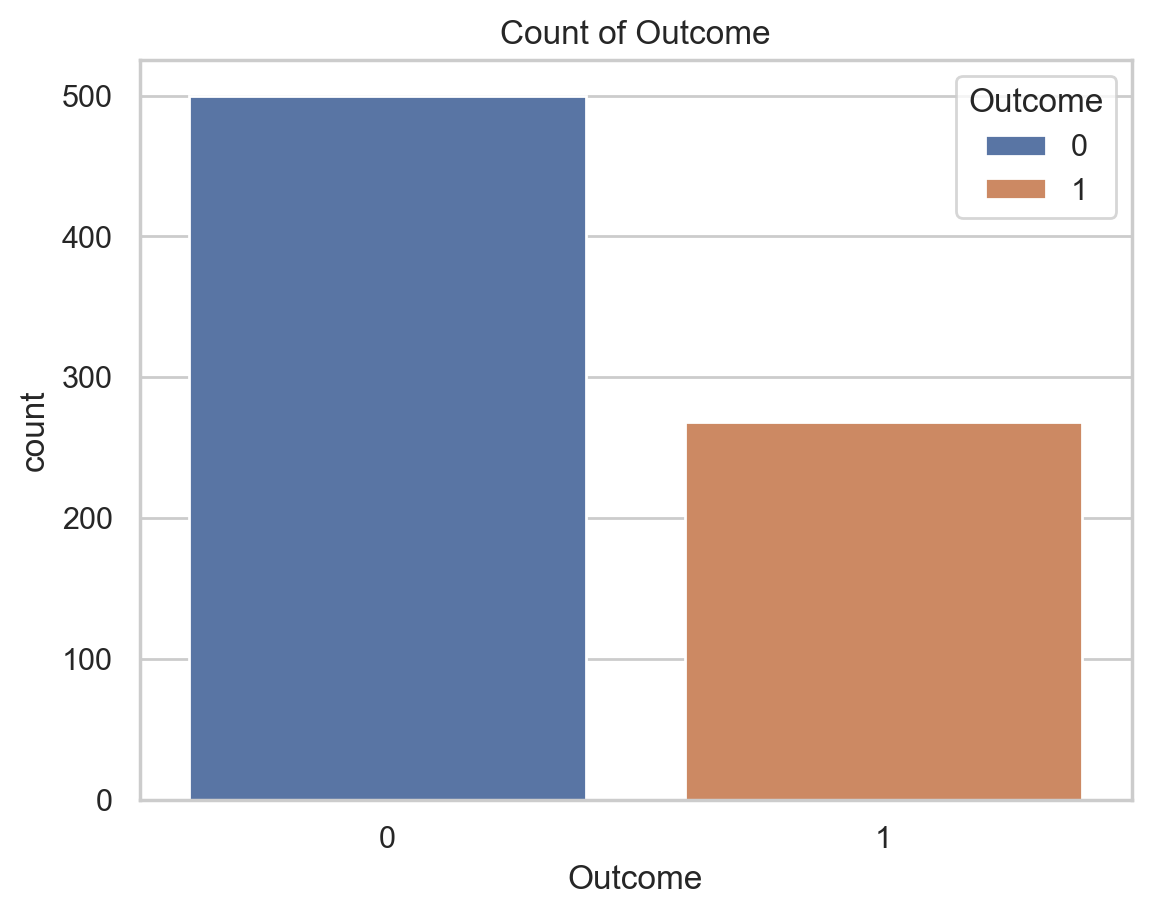

In [13]:
sns.countplot(data=df, x='Outcome', hue='Outcome')
plt.title('Count of Outcome')
plt.show()

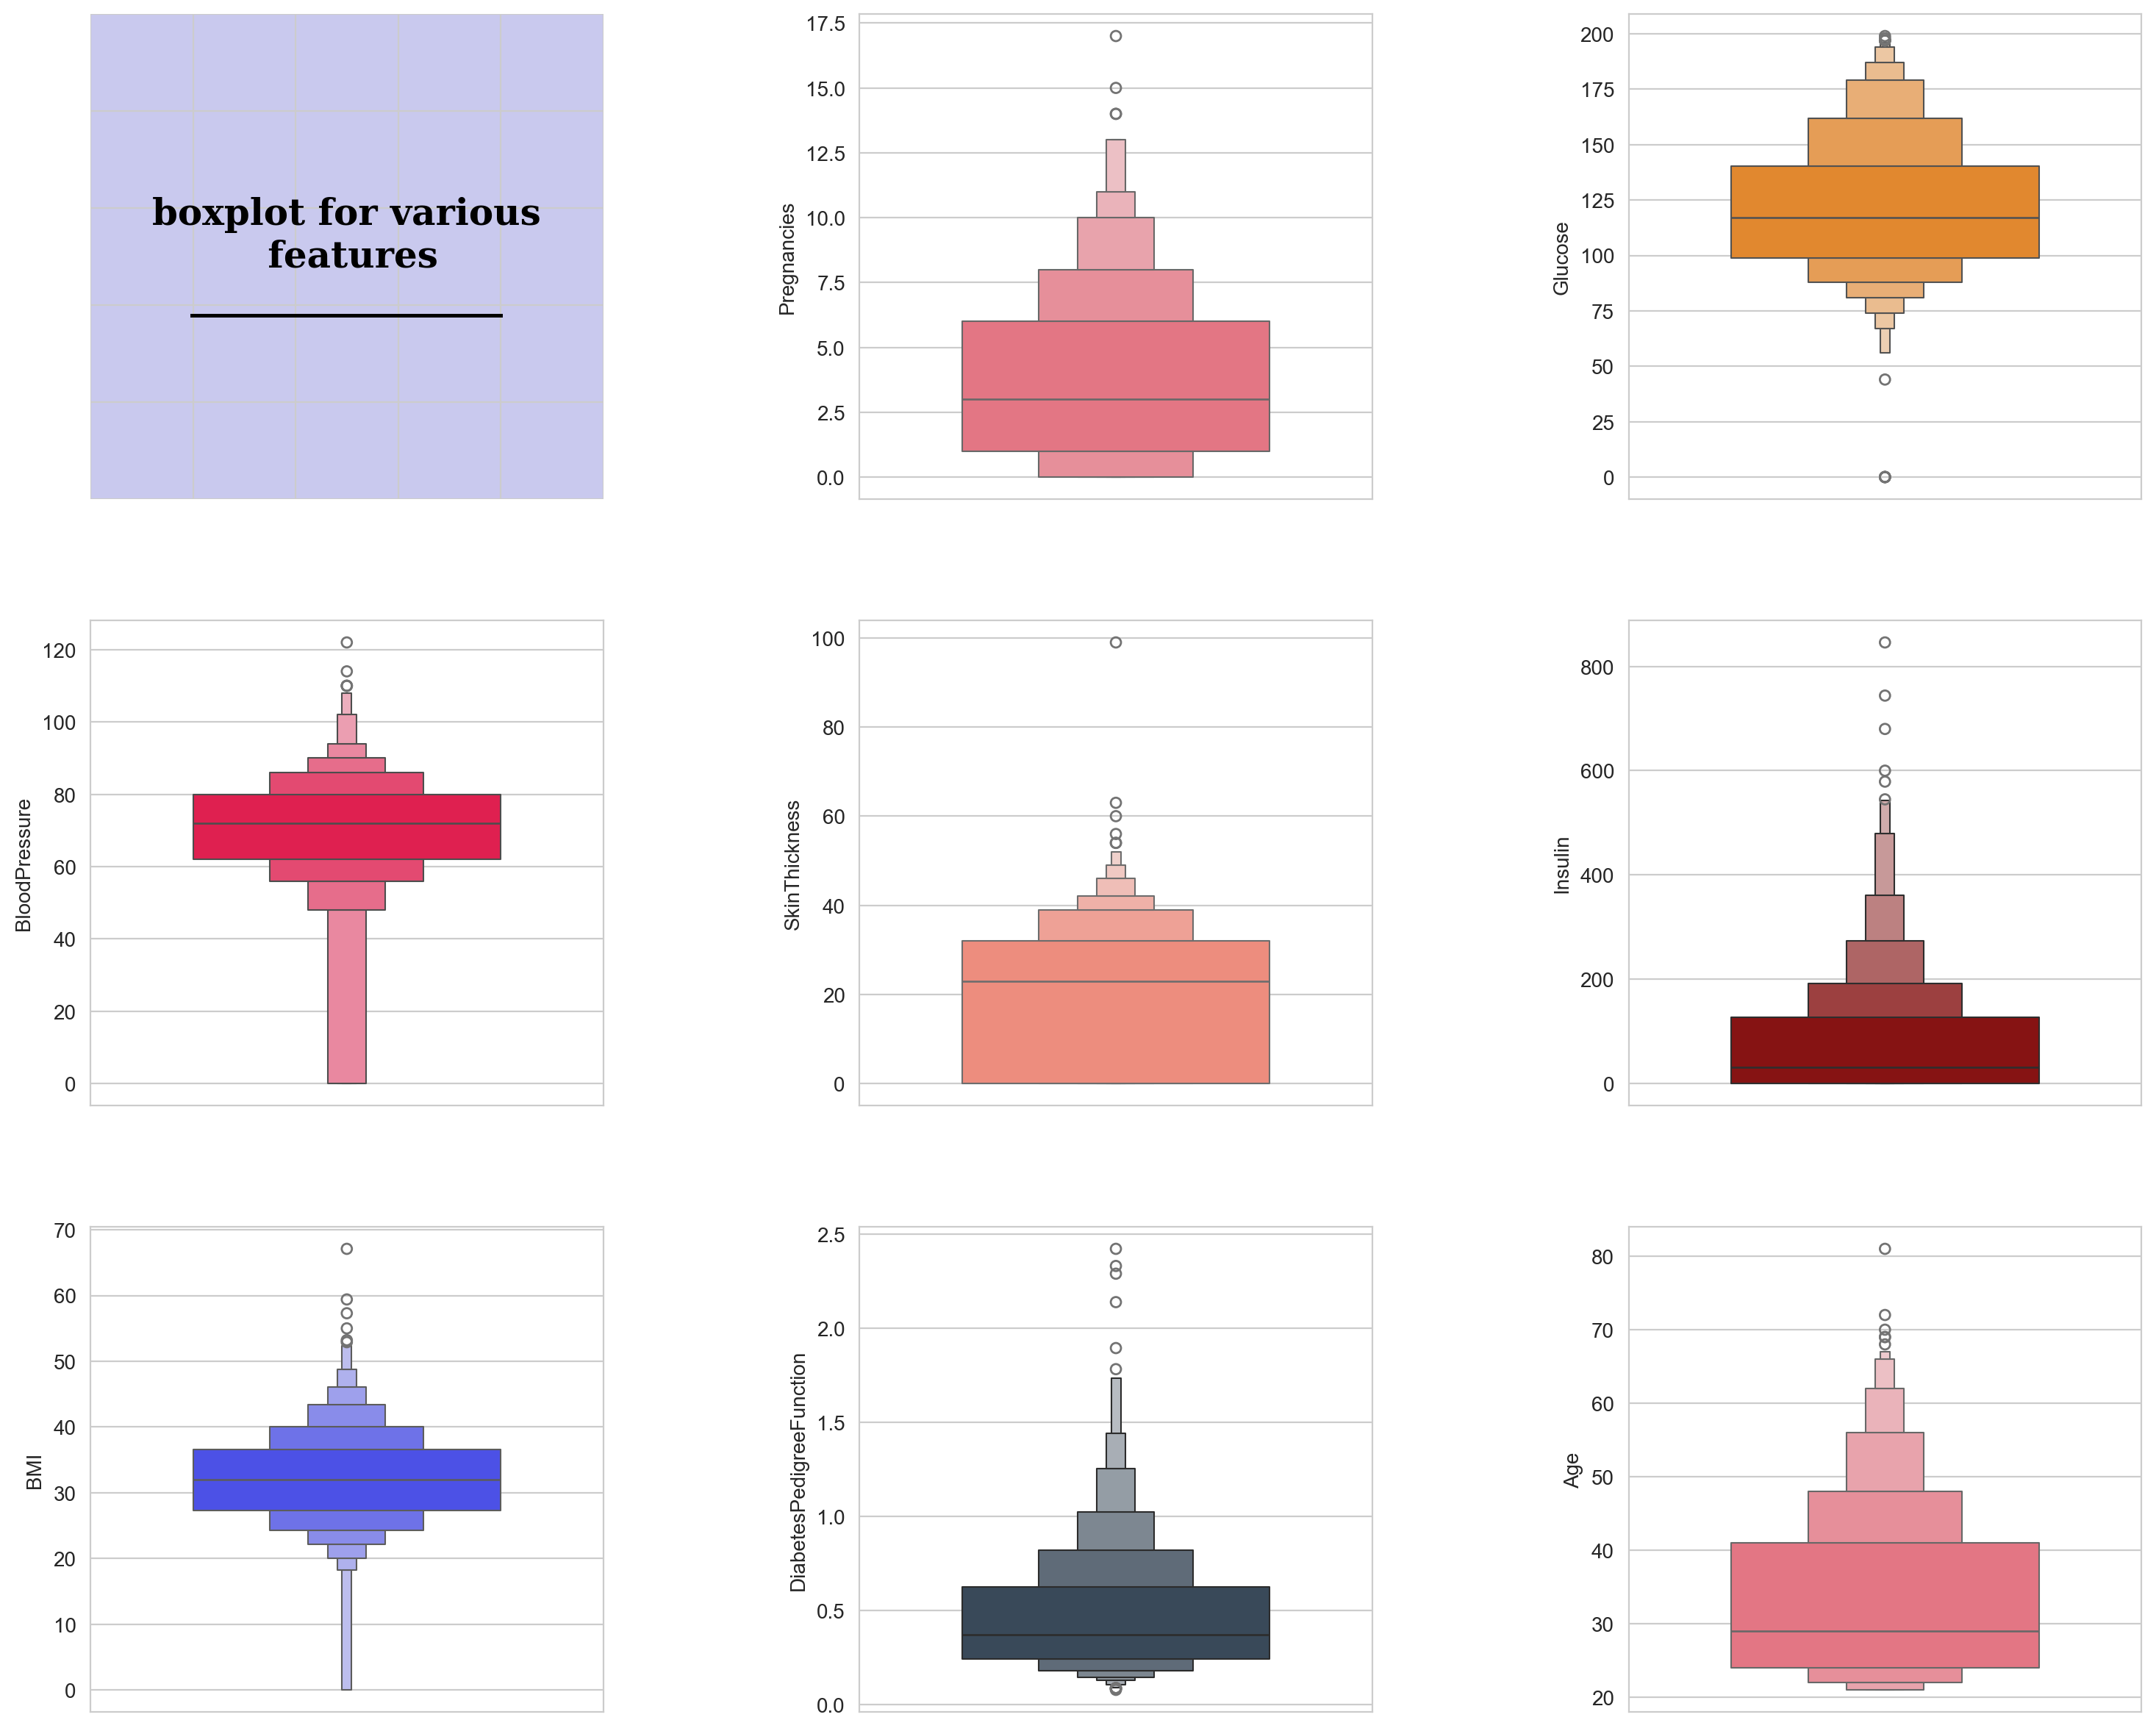

In [32]:
fig = plt.figure(figsize = (18, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace= 0.5, hspace = 0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#c9c9ee"
ax0.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'boxplot for various\n features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

sns.boxenplot(ax=ax1,y=df['Pregnancies'],palette=["#f56476"],width=0.6)
sns.boxenplot(ax=ax2,y=df['Glucose'],palette=["#ff8811"],width=0.6)
sns.boxenplot(ax=ax3,y=df['BloodPressure'],palette=["#ff0040"],width=0.6)
sns.boxenplot(ax=ax4,y=df['SkinThickness'],palette=["#ff7f6c"],width=0.6)
sns.boxenplot(ax=ax5,y=df['Insulin'],palette=["#990000"],width=0.6)
sns.boxenplot(ax=ax6,y=df['BMI'],palette=["#3339FF"],width=0.6)
sns.boxenplot(ax=ax7,y=df['DiabetesPedigreeFunction'],palette=["#34495E"],width=0.6)
sns.boxenplot(ax=ax8,y=df['Age'],palette=["#f56476"],width=0.6)

plt.show()

* 각 feature의 분포를 확인하기 위해 boxplot을 사용했다.
* 거의 모든 feature에서 이상치가 존재하는 것을 확인할 수 있다.
* 더 구체적으로 살펴보기 위해 histogram을 그려보자.

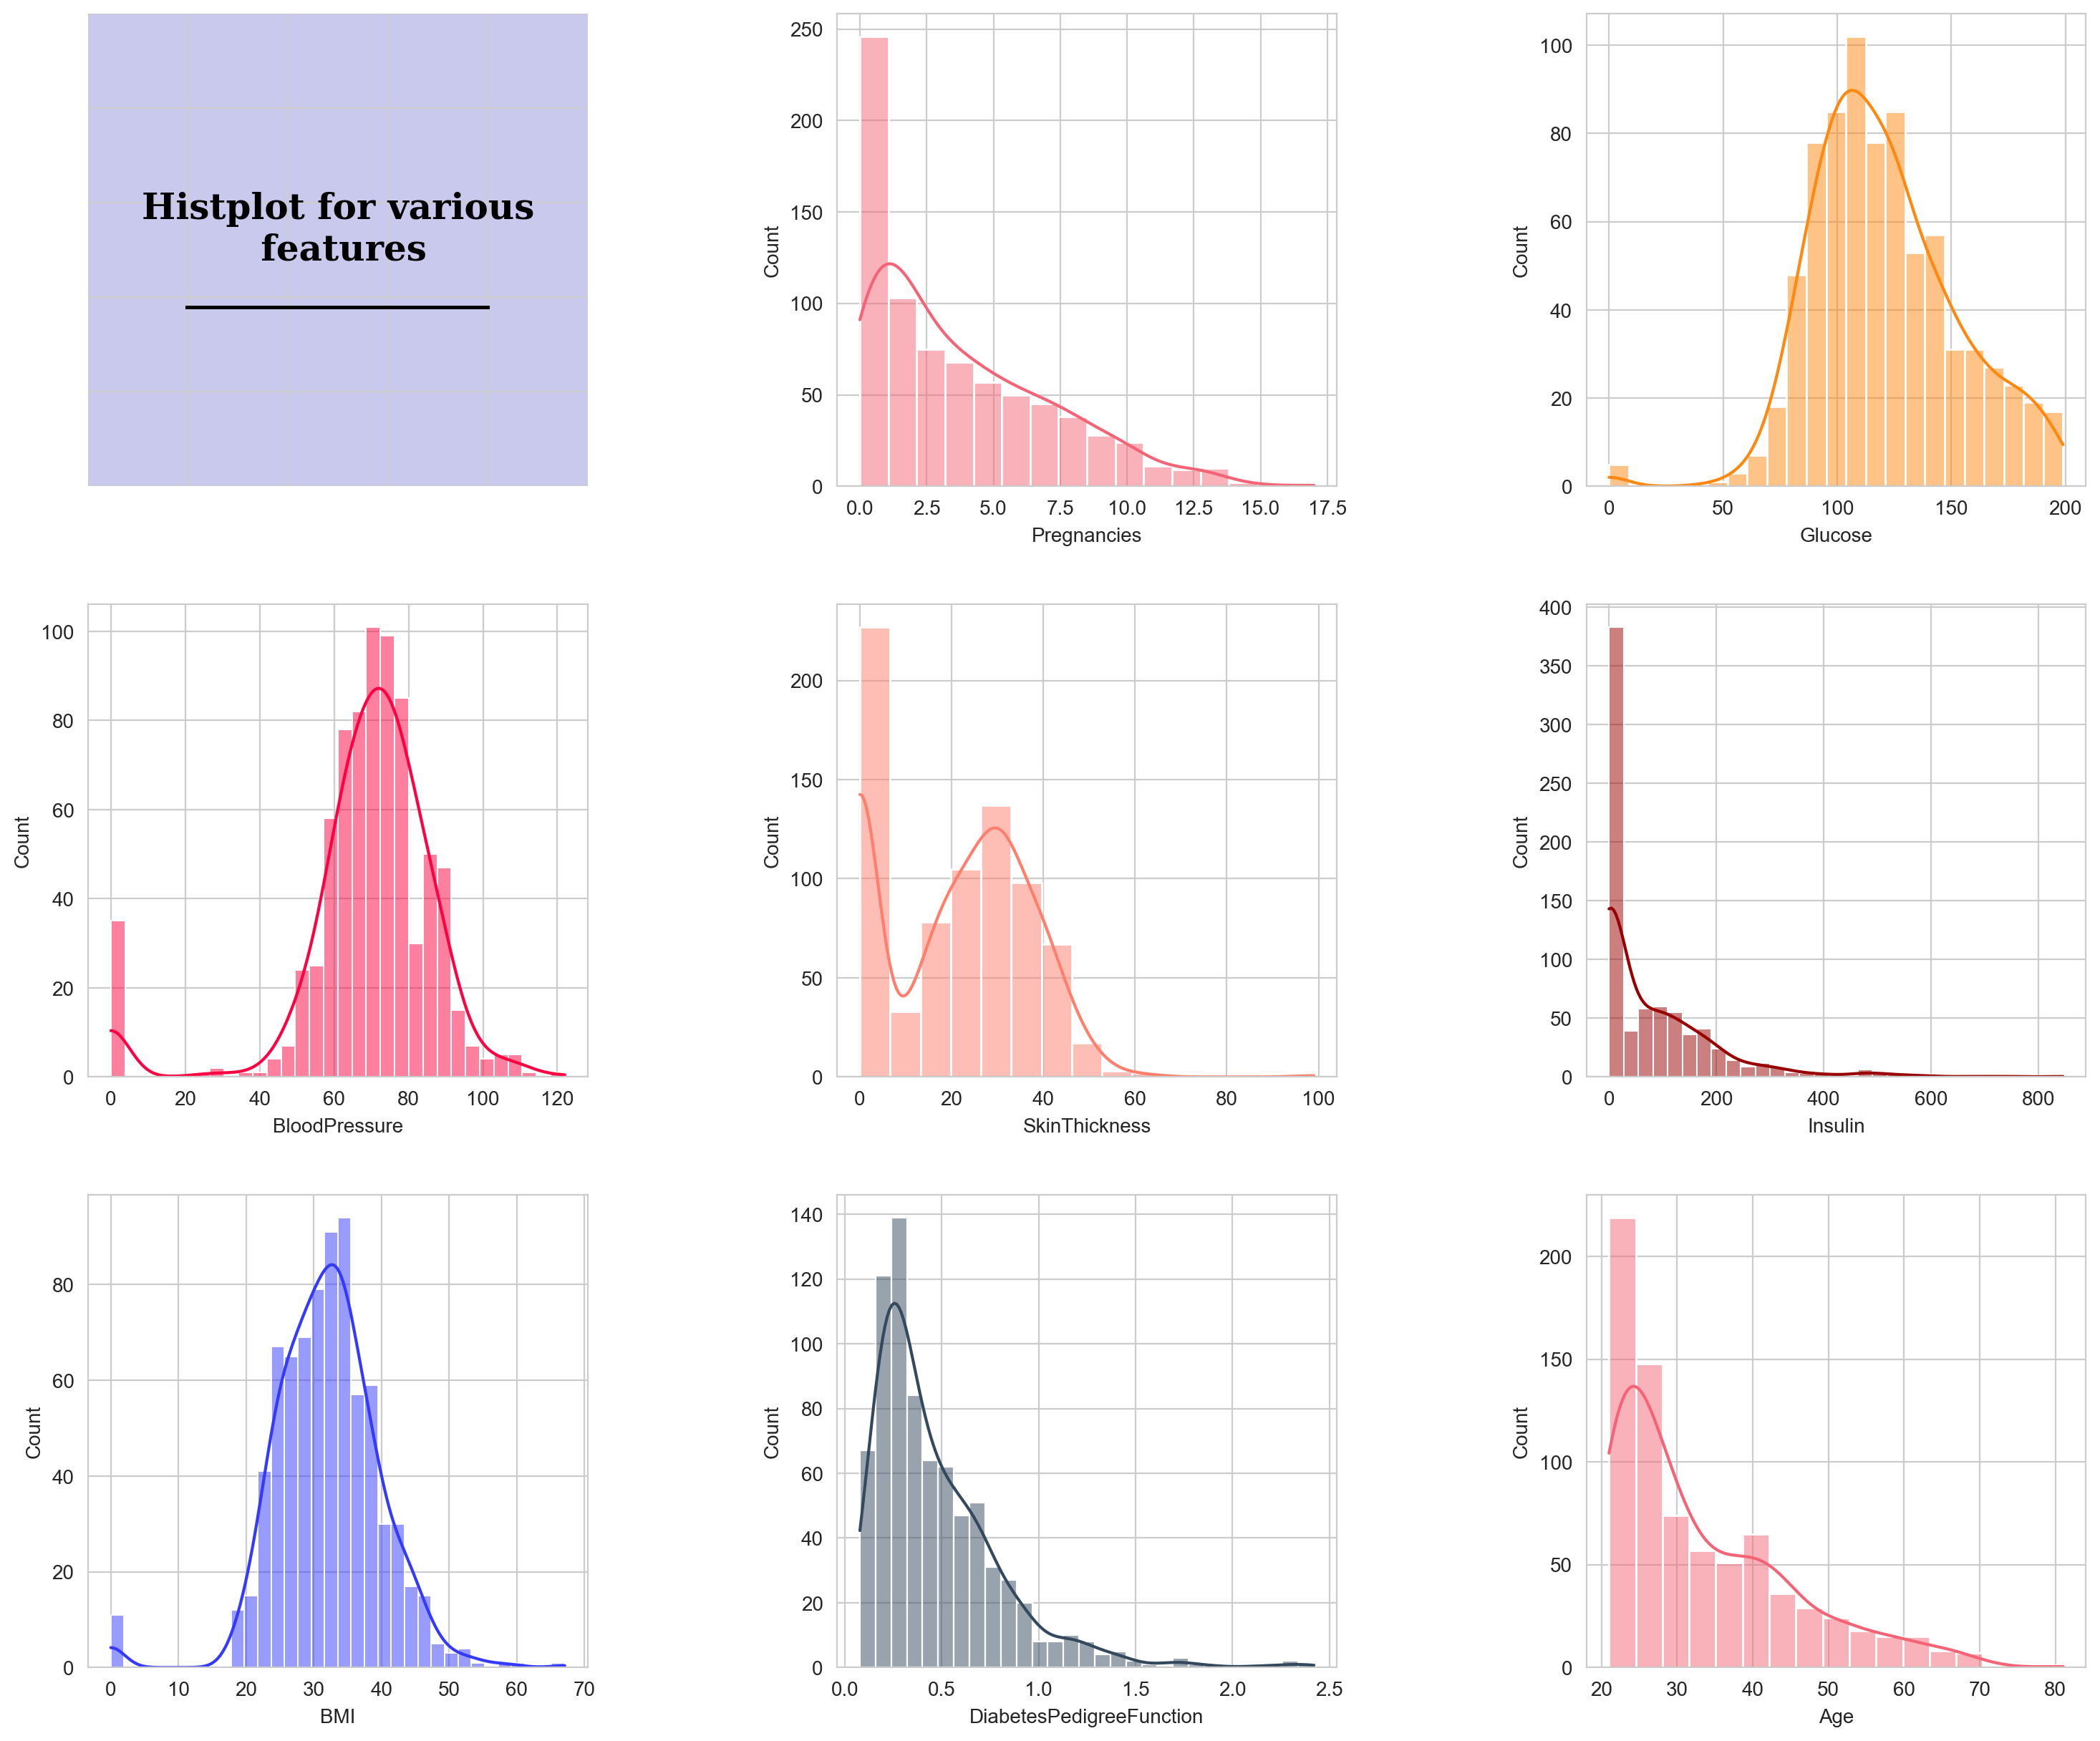

In [34]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#c9c9ee"
ax0.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Histplot for various\n features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

sns.histplot(ax=ax1,x=df['Pregnancies'],color="#f56476",kde=True)
sns.histplot(ax=ax2,x=df['Glucose'],color="#ff8811",kde=True)
sns.histplot(ax=ax3,x=df['BloodPressure'],color="#ff0040",kde=True)
sns.histplot(ax=ax4,x=df['SkinThickness'],color="#ff7f6c",kde=True)
sns.histplot(ax=ax5,x=df['Insulin'],color="#990000",kde=True)
sns.histplot(ax=ax6,x=df['BMI'],color="#3339FF",kde=True)
sns.histplot(ax=ax7,x=df['DiabetesPedigreeFunction'],color="#34495E",kde=True)
sns.histplot(ax=ax8,x=df['Age'],color="#f56476",kde=True)
plt.show()

* 각 Feature의 양 끝에 극단적인 outlier가 존재하는것을 알 수 있다.
* 모델링을 하기전에 이상치를 제거를 하면 모델의 성능이 향상될 수 있을 것이다.

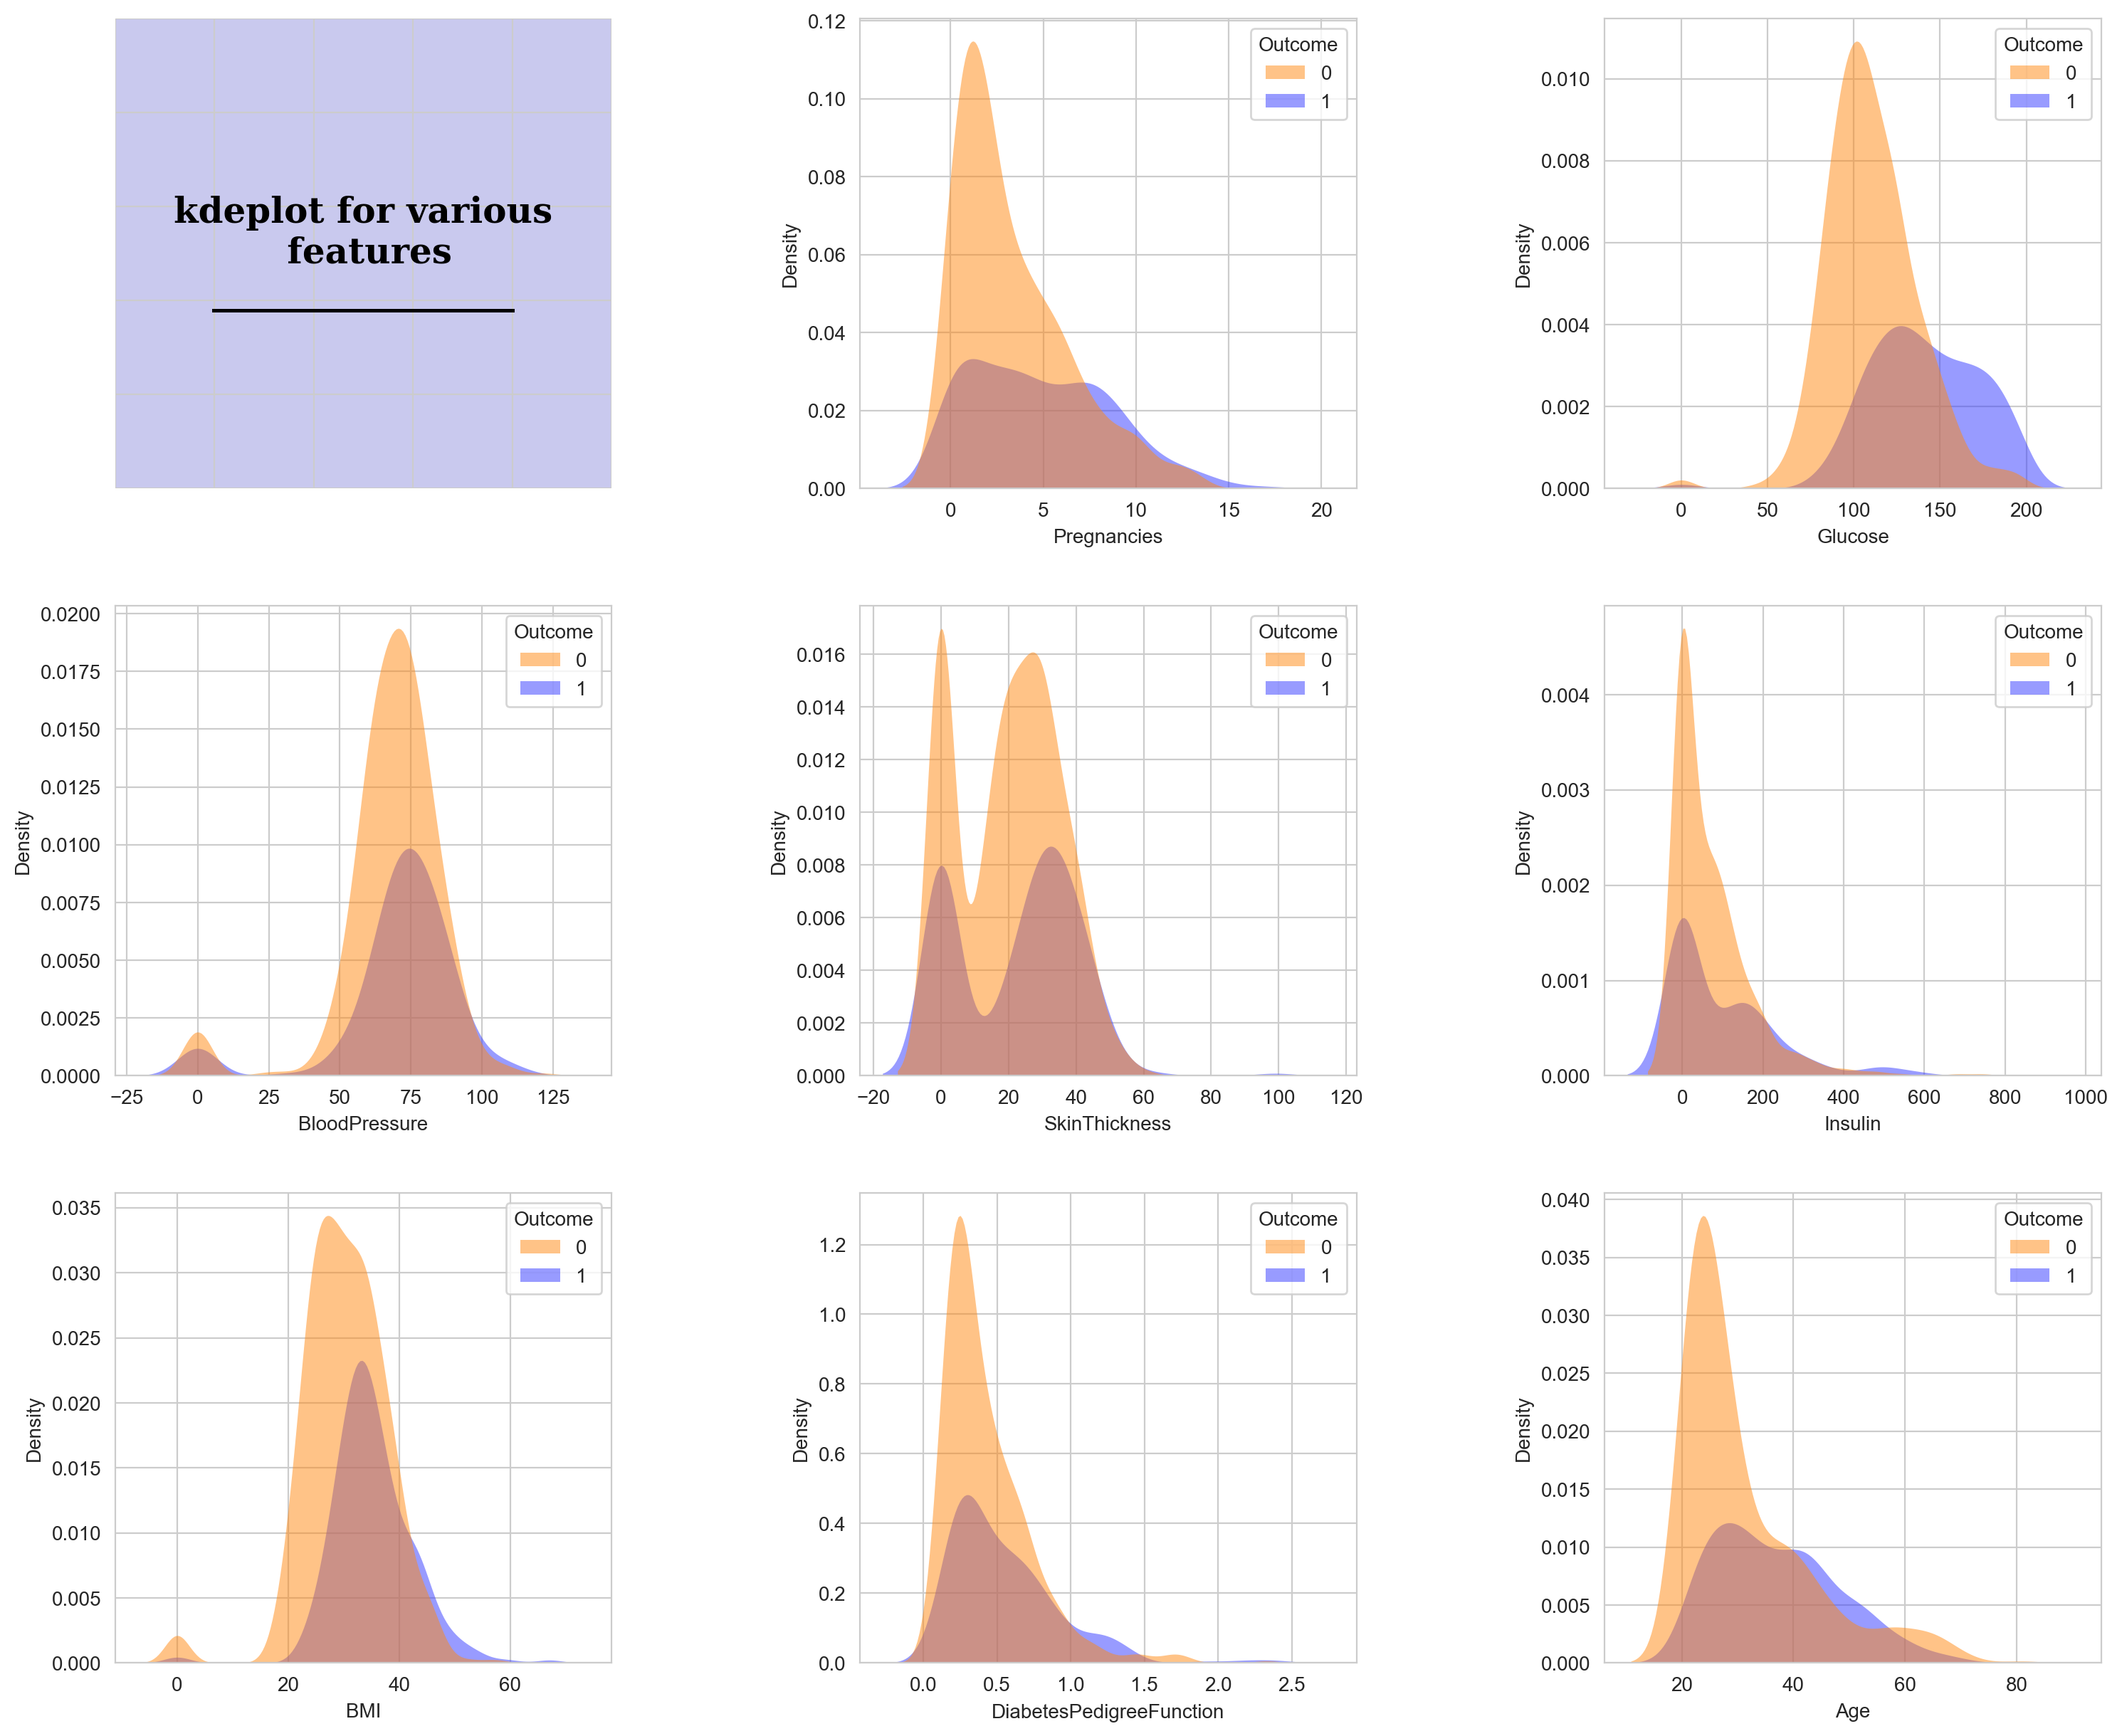

In [35]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#c9c9ee"
ax0.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'kdeplot for various\n features\n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")


sns.kdeplot(ax=ax1, data=df, x='Pregnancies',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
sns.kdeplot(ax=ax2, data=df, x='Glucose',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
sns.kdeplot(ax=ax3, data=df, x='BloodPressure',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
sns.kdeplot(ax=ax4, data=df, x='SkinThickness',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
sns.kdeplot(ax=ax5, data=df, x='Insulin',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
sns.kdeplot(ax=ax6, data=df, x='BMI',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
sns.kdeplot(ax=ax7, data=df, x='DiabetesPedigreeFunction',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
sns.kdeplot(ax=ax8, data=df, x='Age',hue="Outcome", fill=True,palette=["#ff8811","#3339FF"], alpha=.5, linewidth=0)
plt.show()

* Glucose, Insulin, Age 같은 변수는 당뇨병 여부를 잘 구분할 수 있는 중요한 변수로 보이며 일부 변수는 스케일 조정 또는 로그 변환을 고려해야 모델 성능을 높일 수 있다.
* 모델링 하기전에 스케일 조정을 하야겠다..!


#### 다중공선성 확인

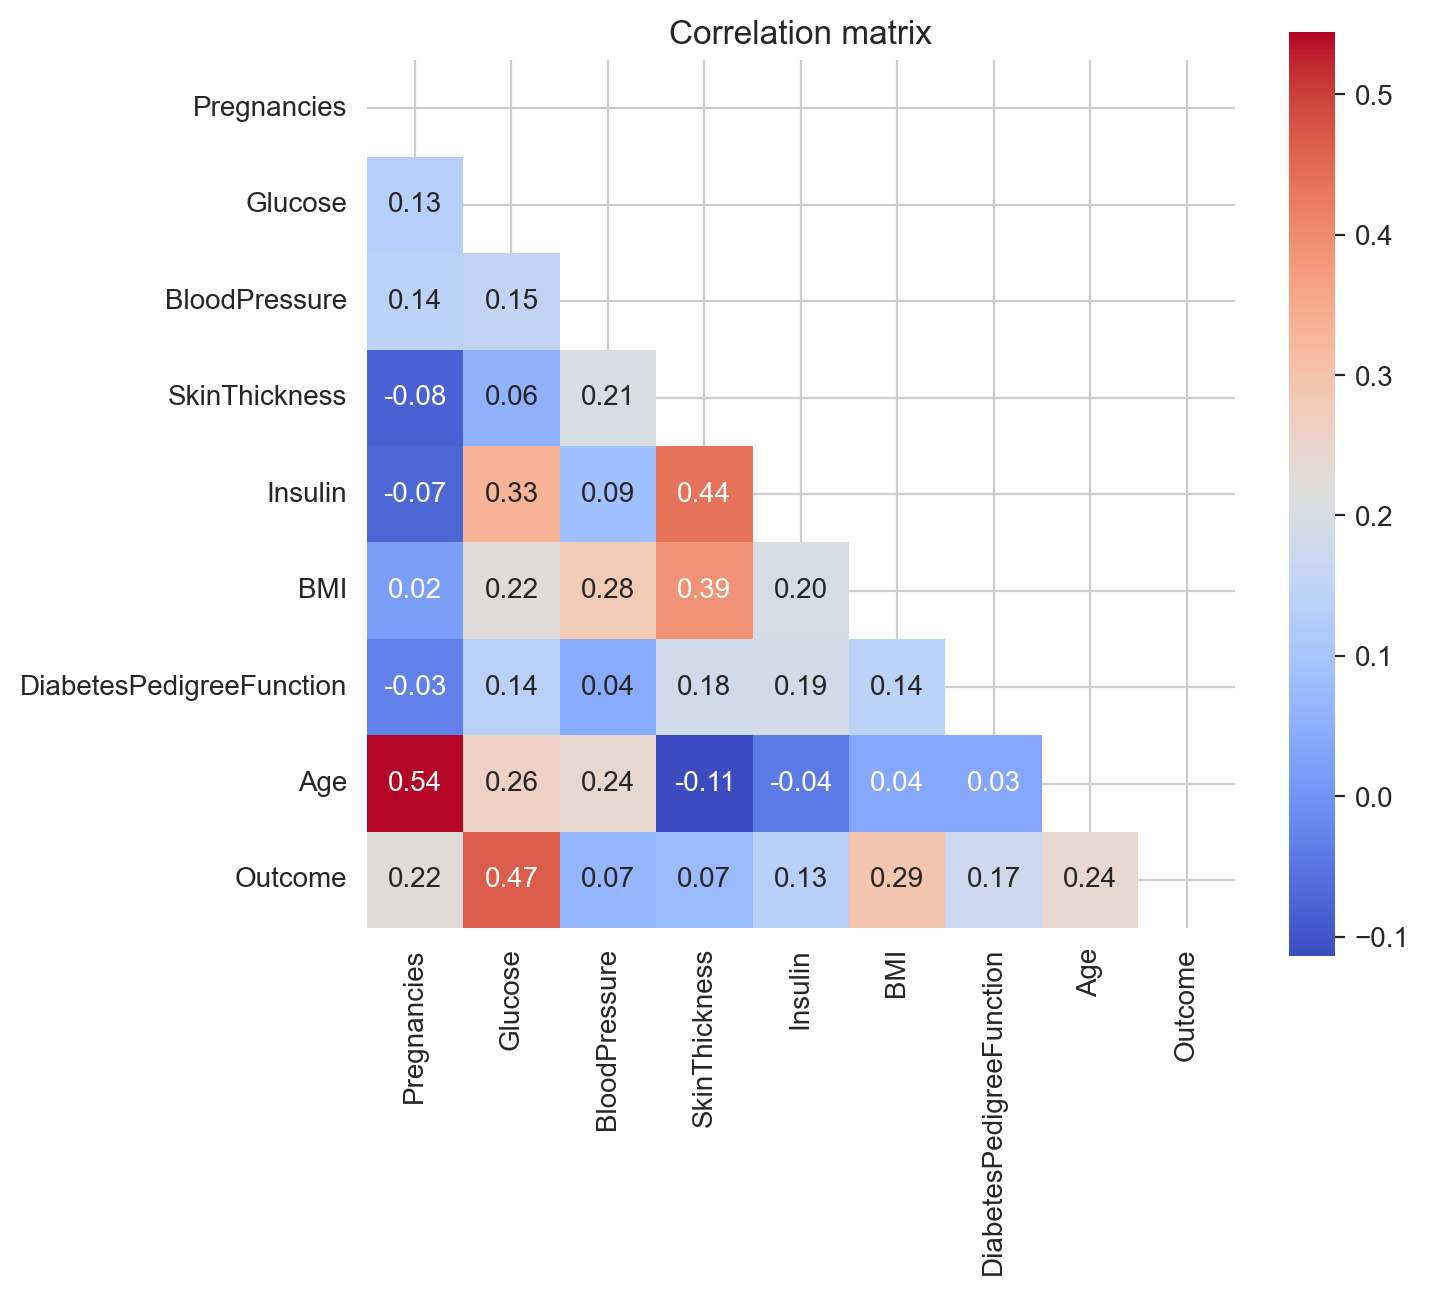

In [36]:
corr = df.corr()

plt.figure(figsize=(7,6))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".2f", square=True, cmap="coolwarm", mask = mask)
plt.title("Correlation matrix")
plt.show()

* 0.8 이상의 상관관계를 가지는 feature들은 다중공선성 문제를 일으킬 수 있다.
* 히지만 이 데이터에서는 0.8 이상의 상관관계를 가지는 feature들은 존재하지 않는다.
* 더 정확한 파악을 위해 VIF를 계산해보자.

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = df.iloc[:, :-1]
X_const = sm.add_constant(X)
vif_df = pd.DataFrame({
    "feature": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i)
            for i in range(X_const.shape[1])]
})
print(vif_df.sort_values("VIF", ascending=False).transpose())

                 0         8              4            1         5         2  \
feature      const       Age  SkinThickness  Pregnancies   Insulin   Glucose   
VIF      35.039974  1.588368       1.507432     1.430872  1.427536  1.298961   

               6              3                         7  
feature      BMI  BloodPressure  DiabetesPedigreeFunction  
VIF      1.29745       1.181863                   1.06709  


* Constant의 VIF 값이 1.0으로 나오는 것은 상수항을 포함하기 때문이며, 나머지 feature들은 모두 10 이하로 다중공선성 문제는 없는 것으로 보인다.

#### 이상치 제거

In [39]:
def remove_outlier_by_iqr(df, col, k=1.5):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]



df_clean = df.copy()

for col in df_clean.columns:
    df_clean = remove_outlier_by_iqr(df_clean, col, k=1.5)

print(df.shape, "→", df_clean.shape)

(768, 9) → (636, 9)


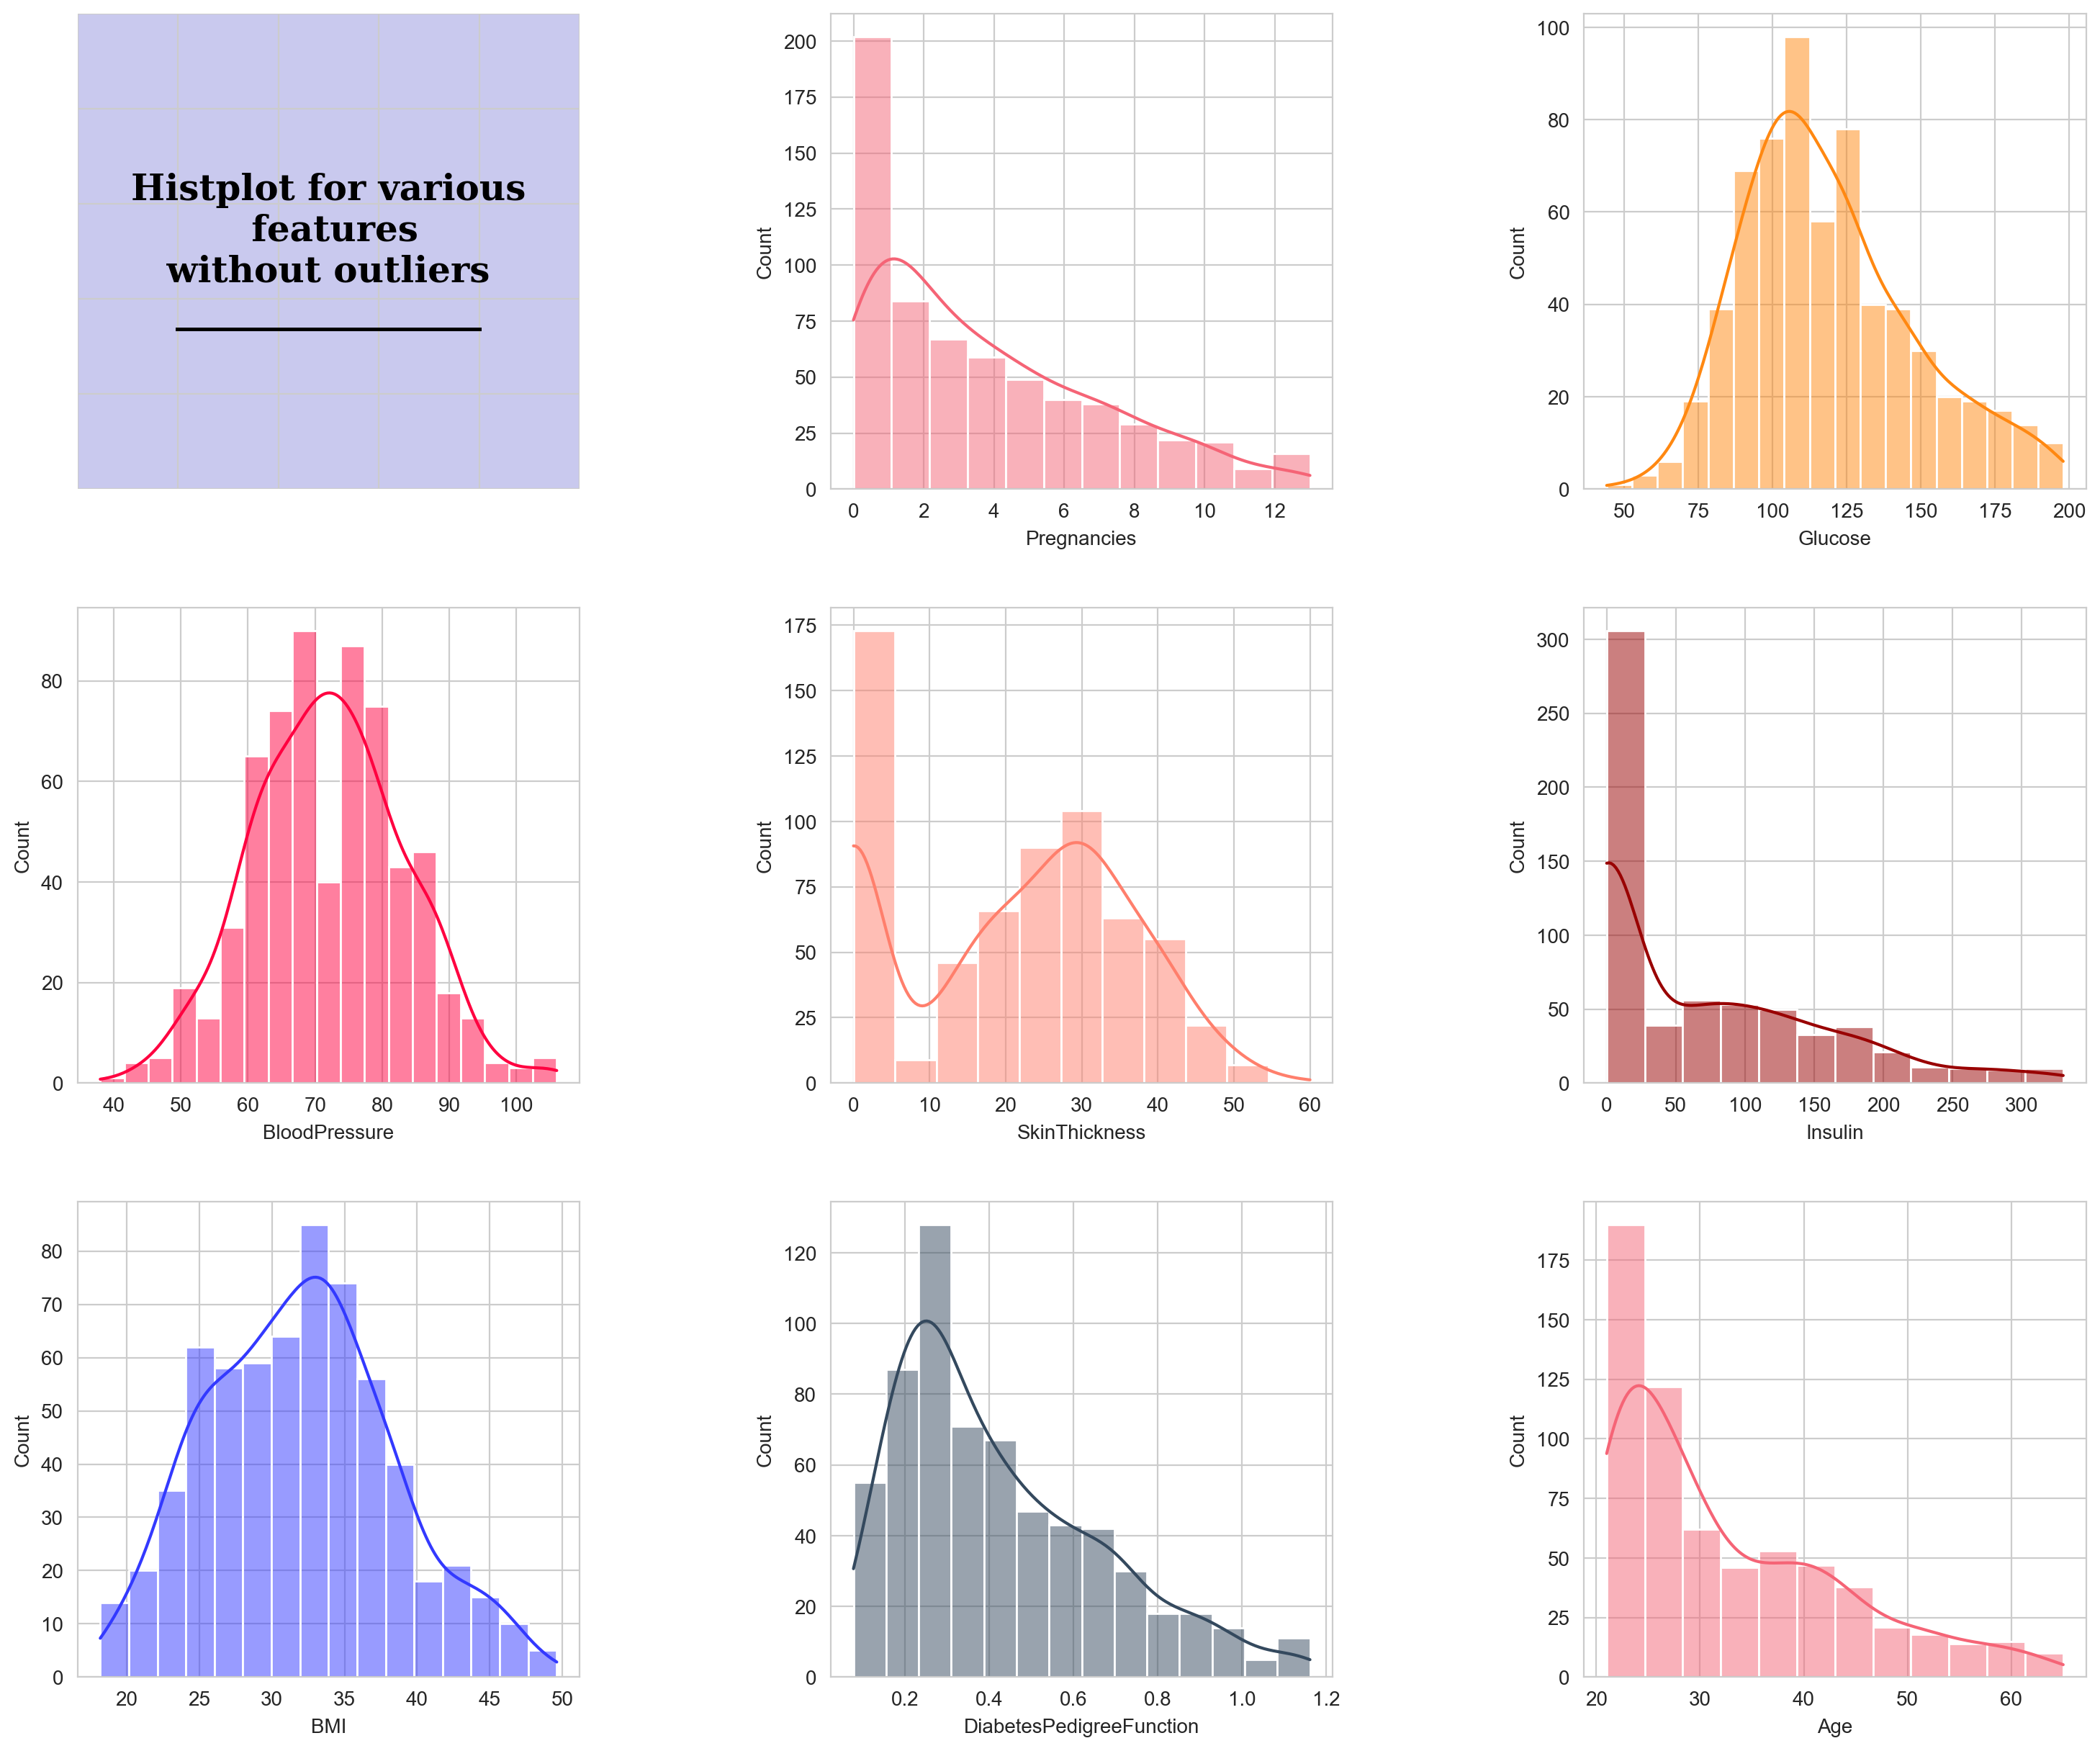

In [40]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])
ax6 = fig.add_subplot(gs[2,0])
ax7 = fig.add_subplot(gs[2,1])
ax8 = fig.add_subplot(gs[2,2])

background_color = "#c9c9ee"
ax0.set_facecolor(background_color)
ax0.spines["bottom"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.text(0.5,0.5,
         'Histplot for various\n features\n without outliers \n_________________',
         horizontalalignment='center',
         verticalalignment='center',
         fontsize=18, fontweight='bold',
         fontfamily='serif',
         color="#000000")

sns.histplot(ax=ax1,x=df_clean['Pregnancies'],color="#f56476",kde=True)
sns.histplot(ax=ax2,x=df_clean['Glucose'],color="#ff8811",kde=True)
sns.histplot(ax=ax3,x=df_clean['BloodPressure'],color="#ff0040",kde=True)
sns.histplot(ax=ax4,x=df_clean['SkinThickness'],color="#ff7f6c",kde=True)
sns.histplot(ax=ax5,x=df_clean['Insulin'],color="#990000",kde=True)
sns.histplot(ax=ax6,x=df_clean['BMI'],color="#3339FF",kde=True)
sns.histplot(ax=ax7,x=df_clean['DiabetesPedigreeFunction'],color="#34495E",kde=True)
sns.histplot(ax=ax8,x=df_clean['Age'],color="#f56476",kde=True)
plt.show()

* 이상치 제거 후 각 feature의 분포를 확인하기 위해 histogram을 다시 그려보았다.
* 이상치가 제거 되어 분포가 상당히 깔끔해졌다.

In [55]:
from typing import Tuple
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

def run_logistic_rfe(
    df: pd.DataFrame,
    target_col: str,
    n_features: int = 10,
    test_size: float = 0.2,
    random_state: int = 42,
    solver: str = "liblinear",
    max_iter: int = 10000,
    print_report: bool = True
) -> Tuple[LogisticRegression, RFE, pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:

    # 1. Train & test split
    X = df.drop(columns=target_col)
    y = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # 2. Data scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 3. RFE( selectuing features)
    base_estimator = LogisticRegression(
        random_state=random_state, solver=solver, max_iter=max_iter
    )
    selector = RFE(base_estimator, n_features_to_select=n_features)
    selector = selector.fit(X_train_scaled, y_train)

    print("선택된 변수 (True는 선택된 변수):\n", selector.support_)
    print("변수의 순위 (1-선택된 변수, 숫자가 클수록 덜 중요한 변수):\n", selector.ranking_)

    X_train_sel = selector.transform(X_train_scaled)
    X_test_sel = selector.transform(X_test_scaled)

    # 4. Fitting models
    model = LogisticRegression(random_state=random_state, max_iter=max_iter)
    model.fit(X_train_sel, y_train)

    # 5. Predictoion
    y_pred = model.predict(X_test_sel)

    # 6. Confusion matrix & classification report
    if print_report:
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # 7. ROC Curve
        y_pred_prob = model.predict_proba(X_test_sel)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(7,5))
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate (Recall)')
        plt.title('ROC Curve')
        plt.legend(loc="lower right")
        plt.grid()
        plt.show()

        # 8. ANOVA table
        X_train_sel_const = sm.add_constant(X_train_sel)
        sm_logit = sm.Logit(y_train, X_train_sel_const)
        result = sm_logit.fit(disp=0)

        print("\n회귀 계수 및 p-value:")
        print(result.summary2().tables[1])

    return model, selector, pd.DataFrame(X_train_sel), y_train.reset_index(drop=True), pd.DataFrame(X_test_sel), y_test.reset_index(drop=True)


<hr>

선택된 변수 (True는 선택된 변수):
 [ True  True  True  True  True  True  True  True]
변수의 순위 (1-선택된 변수, 숫자가 클수록 덜 중요한 변수):
 [1 1 1 1 1 1 1 1]

Confusion Matrix:
[[82 18]
 [26 28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



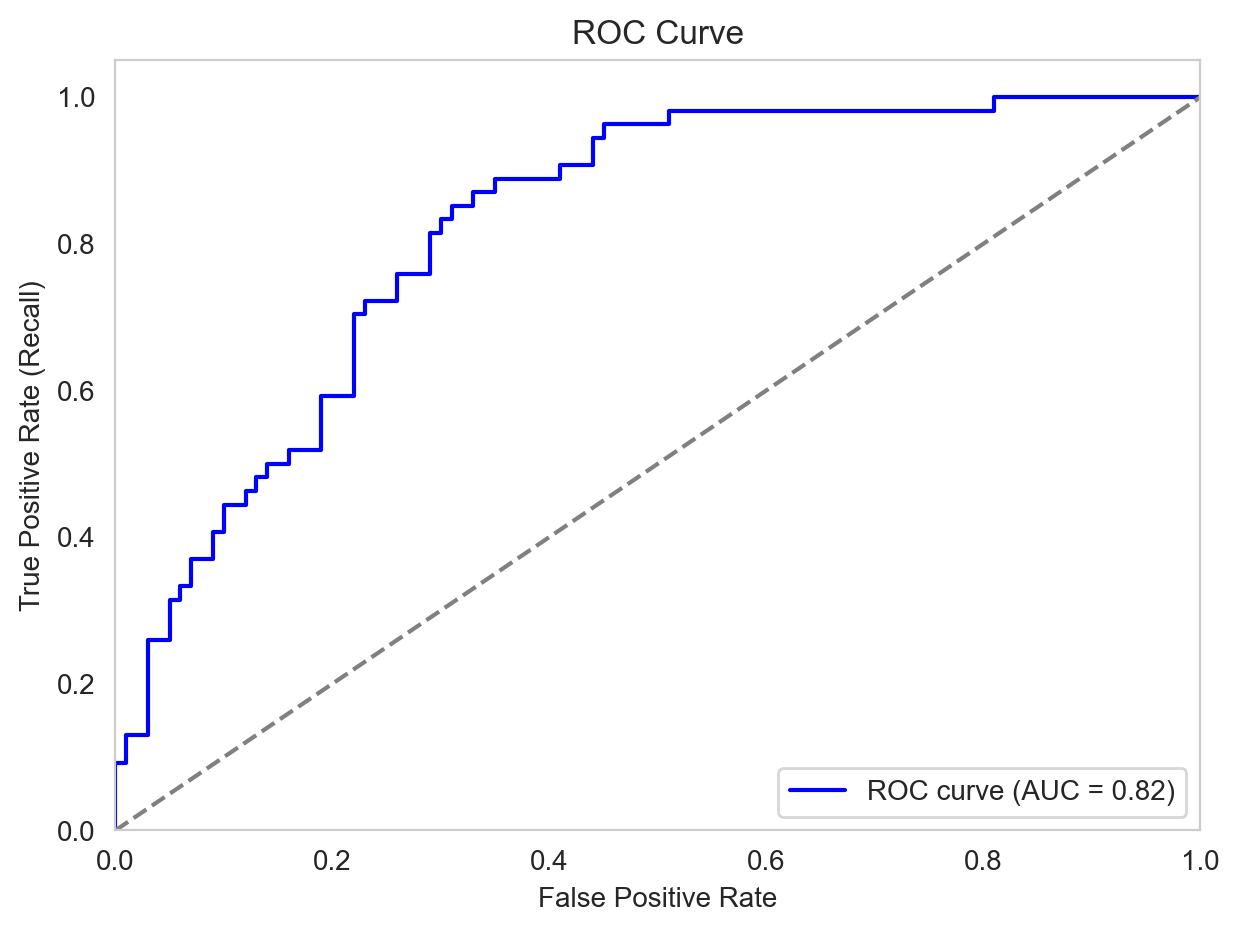


회귀 계수 및 p-value:
          Coef.  Std.Err.         z         P>|z|    [0.025    0.975]
const -0.880665  0.109204 -8.064387  7.360426e-16 -1.094701 -0.666629
x1     0.380497  0.121621  3.128542  1.756761e-03  0.142124  0.618870
x2     1.166076  0.135455  8.608586  7.396698e-18  0.900589  1.431563
x3    -0.204829  0.110415 -1.855083  6.358441e-02 -0.421238  0.011580
x4     0.069504  0.126084  0.551249  5.814629e-01 -0.177616  0.316623
x5    -0.137079  0.123843 -1.106874  2.683484e-01 -0.379806  0.105649
x6     0.727371  0.134579  5.404772  6.489099e-08  0.463600  0.991142
x7     0.259316  0.111062  2.334876  1.954990e-02  0.041638  0.476994
x8     0.181874  0.121318  1.499153  1.338339e-01 -0.055905  0.419653


In [57]:
# with outlier
model_1 = run_logistic_rfe(df, target_col='Outcome',
    n_features=10,
    test_size=0.2,
    random_state=42,
    solver='liblinear',
    max_iter=10000,
    print_report=True
)

##### (1) 성능 평가
테스트셋 정확도(accuracy)는 71%

양성 클래스(당뇨병 환자)의 recall은 52%, precision은 61%로
⇒ 실제 당뇨병 환자 중 절반 정도만 올바르게 분류하였음.

ROC AUC는 0.82로, 분류모형으로서 우수한 성능을 보인느걸 알 수 있음.

##### (2) 로지스틱 회귀모형 설계 및 계수 해석
로짓(logit) 변환된 확률 모델을 기반으로 결과를 예측함.

주요 변수 해석:

x1, x2, x6, x7 은 p-value가 0.05 미만으로 통계적으로 유의함.

x2 (계수 1.166076, p≈0.00)는 당뇨병 odds를 약 exp(1.166) ≈ 3.21배 증가시키는 강한 영향력을 가진다.

x1 (계수 0.380497, p≈0.002)도 긍정적인 영향력을 갖는다. (OR ≈ 1.46배)

나머지 변수(x3, x4, x5, x8)는 p-value가 0.05 이상으로 통계적 유의성이 없다.

즉 Pregnancies, Glucose, BMI, DPF는 당뇨병에 양의 영향을 미치고, 나머지 변수들은 통계적으로 유의하지 않다.

선택된 변수 (True는 선택된 변수):
 [ True  True  True  True  True  True  True  True]
변수의 순위 (1-선택된 변수, 숫자가 클수록 덜 중요한 변수):
 [1 1 1 1 1 1 1 1]

Confusion Matrix:
[[80  8]
 [18 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        88
           1       0.73      0.55      0.63        40

    accuracy                           0.80       128
   macro avg       0.77      0.73      0.74       128
weighted avg       0.79      0.80      0.79       128



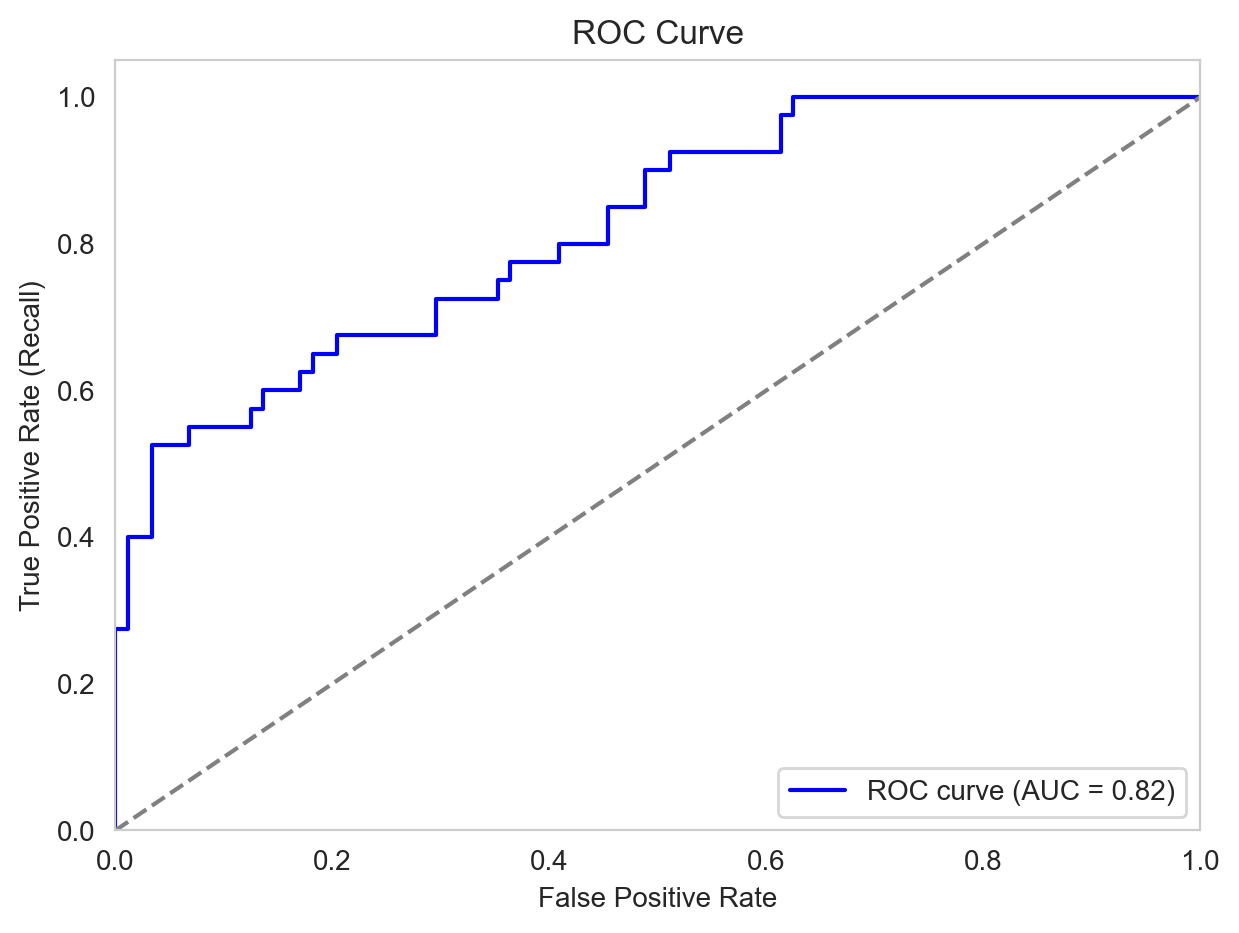


회귀 계수 및 p-value:
          Coef.  Std.Err.         z         P>|z|    [0.025    0.975]
const -1.135160  0.127940 -8.872620  7.144497e-19 -1.385917 -0.884403
x1     0.533327  0.143836  3.707872  2.090086e-04  0.251413  0.815241
x2     1.173772  0.147191  7.974495  1.530053e-15  0.885283  1.462261
x3    -0.184907  0.132338 -1.397231  1.623441e-01 -0.444284  0.074471
x4    -0.047935  0.140538 -0.341081  7.330425e-01 -0.323383  0.227514
x5    -0.019244  0.140046 -0.137410  8.907067e-01 -0.293729  0.255242
x6     0.565855  0.145043  3.901289  9.568169e-05  0.281576  0.850134
x7     0.369478  0.117880  3.134357  1.722313e-03  0.138437  0.600519
x8     0.111217  0.149765  0.742609  4.577185e-01 -0.182317  0.404752


In [58]:
# without outlier
model_2 = run_logistic_rfe(df_clean, target_col='Outcome',
    n_features=10,
    test_size=0.2,
    random_state=42,
    solver='liblinear',
    max_iter=10000,
    print_report=True
)

##### (1) 성능 평가
테스트셋 정확도(accuracy)는 80%로 개선

양성 클래스(당뇨병 환자)의 recall은 55%, precision은 73%로 향상

ROC AUC는 0.82로 모델1과 동일

##### (2) 로지스틱 회귀모형 설계 및 계수 해석
동일하게 로짓(logit) 기반 확률 예측을 수행.

주요 변수 해석:

x1, x2, x6, x7 모두 p-value가 0.05 미만 → 통계적으로 유의

x2 (계수 1.173772, p≈0.00)는 여전히 가장 강력한 변수로, odds를 exp(1.174) ≈ 3.23배 증가시킴

x1 (계수 0.533327, p≈0.0002) 역시 영향력이 크며 (OR ≈ 1.70배)

다른 변수들은 p>0.05로 유의하지 않음


그럼 이번에는 이상치를 제거한 데이터에서 통계적으로 유의하지 않은 변수들을 제거해보자.

(통계적으로 유의하지 않은 변수들을 제거한다고 해서 꼭 성능이 좋아지는 것은 아니다.)

변수 개수: 5
선택된 변수 (True는 선택된 변수):
 [ True  True  True  True]
변수의 순위 (1-선택된 변수, 숫자가 클수록 덜 중요한 변수):
 [1 1 1 1]

Confusion Matrix:
[[79  9]
 [17 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        88
           1       0.72      0.57      0.64        40

    accuracy                           0.80       128
   macro avg       0.77      0.74      0.75       128
weighted avg       0.79      0.80      0.79       128



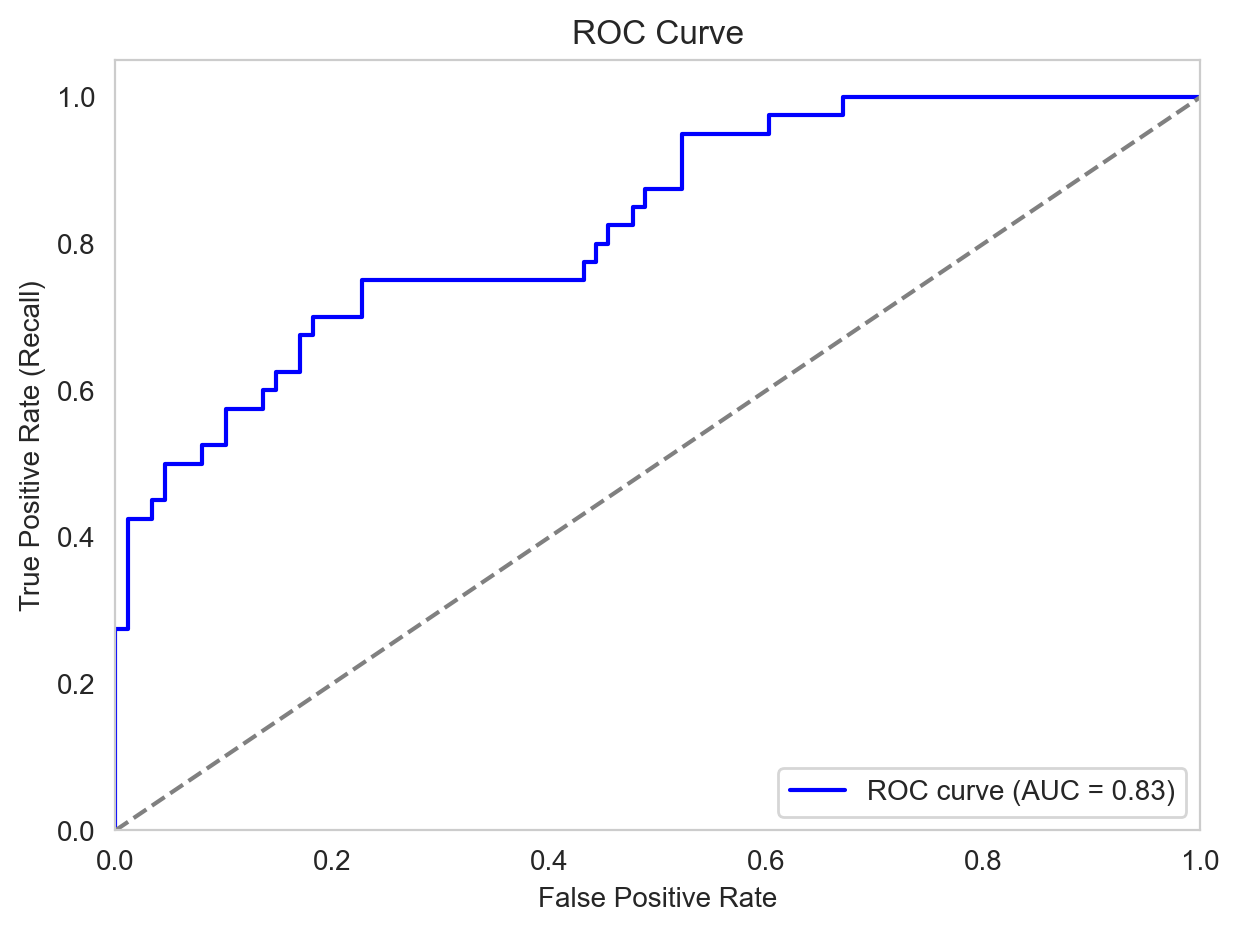


회귀 계수 및 p-value:
          Coef.  Std.Err.         z         P>|z|    [0.025    0.975]
const -1.123926  0.126768 -8.866015  7.581048e-19 -1.372386 -0.875465
x1     0.566474  0.115054  4.923550  8.498806e-07  0.340972  0.791975
x2     1.148767  0.134933  8.513625  1.685790e-17  0.884304  1.413231
x3     0.491470  0.128572  3.822522  1.320939e-04  0.239473  0.743466
x4     0.361721  0.114510  3.158852  1.583920e-03  0.137285  0.586158


In [61]:
# 유의하지 않은 변수 제거
drop_cols = ['BloodPressure', 'SkinThickness', 'Insulin', 'Age']

df_reduced = df_clean.drop(columns=drop_cols)
print("변수 개수:", df_reduced.shape[1])

model_reduced, selector_reduced, X_train_sel, y_train, X_test_sel, y_test = run_logistic_rfe(
    df_reduced,
    target_col='Outcome',
    n_features=4,
    test_size=0.2,
    random_state=42,
    solver='liblinear',
    max_iter=10000,
    print_report=True
)



이상치(outlier)를 제거하고 통계적으로 유의하지 않은 변수(BloodPressure, SkinThickness, Insulin, Age)를 제거하고

남은 주요 변수(Pregnancies, Glucose, BMI, DiabetesPedigreeFunction)만 사용했더니

정확도와 AUC는 높고, 당뇨병 환자 탐지 성능도 꽤 개선되었다.

또한 회귀계수의 오차도 줄어들었다.

특히,

Recall (환자 탐지율)이 0.50 → 0.57로 7%p 개선

AUC도 0.81 → 0.83로 상승

즉 모델 단순화 + 이상치 제거 둘 다 좋은 효과를 냈다는 결론이다.

따라서 이상치 제거와 통계적으로 유의하지 않은 변수 제거한 모델이 제일 적합하다는 것을 알 수 있다.